# Dataset

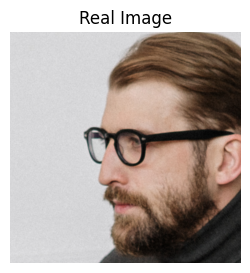

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths to your images
real_image_path = 'examples/pexels-photo-4100489_01.png'

pose_paths = [
    'examples/pose.jpg',
    'examples/pose2.jpg',
    'examples/pose3.jpg',
    'examples/pose4.jpg',
    'examples/pose_MonaLisa.png'
]

generated_paths = [
    'examples/pose_pexels-photo-4100489_01.png',
    'examples/pose2_pexels-photo-4100489_01.png',
    'examples/pose3_pexels-photo-4100489_01.png',
    'examples/pose4_pexels-photo-4100489_01.png',
    'examples/pose_MonaLisa_pexels-photo-4100489_01.png',
]


# --- Display real image ---
plt.figure(figsize=(3, 3))
img = mpimg.imread(real_image_path)
plt.imshow(img)
plt.title("Real Image")
plt.axis('off')
plt.show()



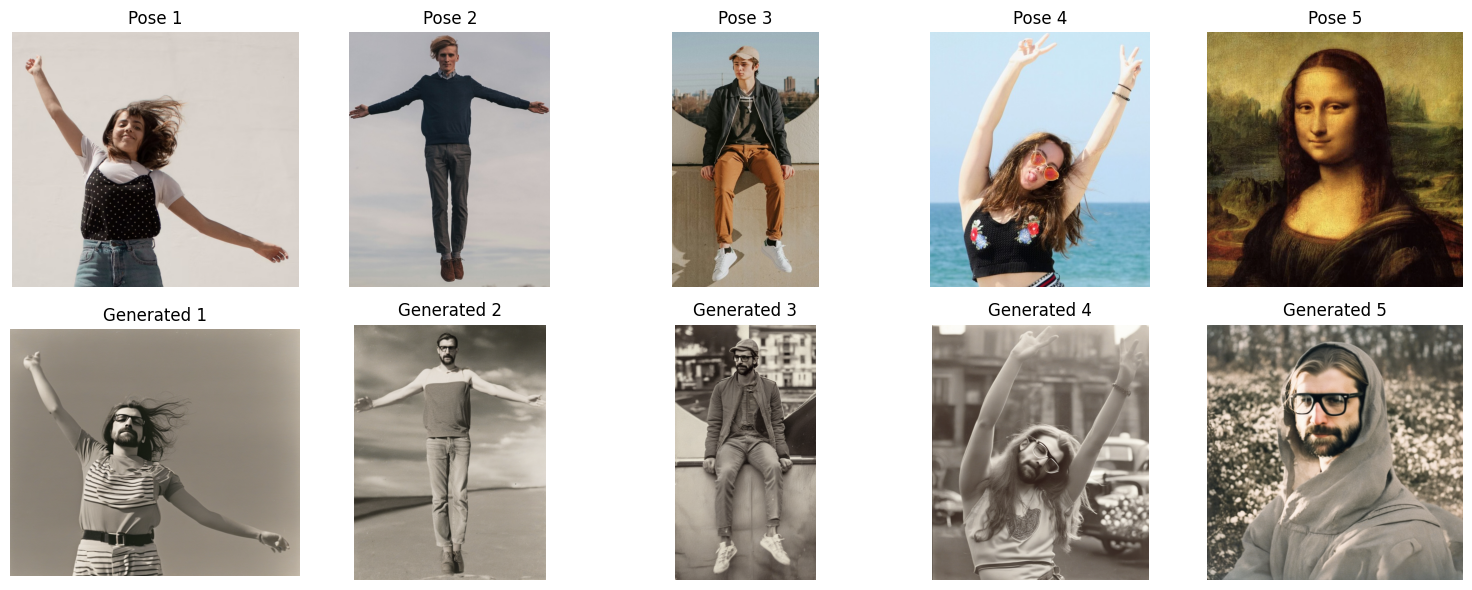

In [5]:
# --- Display poses and generated images ---
num_imgs = len(pose_paths)
fig, axs = plt.subplots(2, num_imgs, figsize=(3 * num_imgs, 6))

# Row 1: Pose reference images
for i, path in enumerate(pose_paths):
    axs[0, i].imshow(mpimg.imread(path))
    axs[0, i].set_title(f"Pose {i+1}")
    axs[0, i].axis('off')

# Row 2: Generated images
for i, path in enumerate(generated_paths):
    axs[1, i].imshow(mpimg.imread(path))
    axs[1, i].set_title(f"Generated {i+1}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()

# Results

In [1]:
import pandas as pd
from sklearn.metrics import classification_report

# Load the CSV files
agi_df = pd.read_csv('AIGCDetectBenchmark/results.csv')
universal_df = pd.read_csv('UniversalFakeDetect/results.csv')

# Extract labels and predictions
agi_labels = agi_df["Label"]
agi_preds = agi_df["y_pred"]
universal_labels = universal_df["Label"]
universal_preds = universal_df["y_pred"]

# Generate classification reports
agi_report = classification_report(agi_labels, agi_preds, output_dict=True)
universal_report = classification_report(universal_labels, universal_preds, output_dict=True)

# Print clean summary with labeled classes
def print_clean_summary(name, report):
    label_names = {'0': 'Real', '1': 'Fake'}
    print(f"=== {name} ===")
    print(f"Accuracy: {report['accuracy']:.2f}")
    for label in ['0', '1']:
        print(f"{label_names[label]} - Precision: {report[label]['precision']:.2f}, Recall: {report[label]['recall']:.2f}, F1: {report[label]['f1-score']:.2f}")
    print()

print_clean_summary("AGI Benchmark Model", agi_report)
print_clean_summary("Universal Model", universal_report)


=== AGI Benchmark Model ===
Accuracy: 0.50
Real - Precision: 0.50, Recall: 0.60, F1: 0.55
Fake - Precision: 0.50, Recall: 0.40, F1: 0.45

=== Universal Model ===
Accuracy: 0.50
Real - Precision: 0.50, Recall: 0.90, F1: 0.64
Fake - Precision: 0.50, Recall: 0.10, F1: 0.17



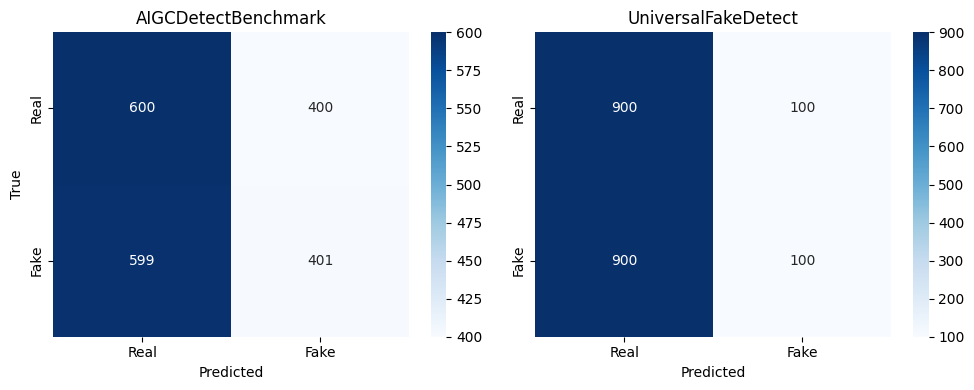

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
agi_cm = confusion_matrix(agi_labels, agi_preds)
universal_cm = confusion_matrix(universal_labels, universal_preds)

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# AGI Benchmark Confusion Matrix
sns.heatmap(agi_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'], ax=axes[0])
axes[0].set_title("AIGCDetectBenchmark")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

# Universal Model Confusion Matrix
sns.heatmap(universal_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'], ax=axes[1])
axes[1].set_title("UniversalFakeDetect")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
